In [1]:
import pandas as pd
import re

In [3]:
FOLDER = 'C:/Users/USER/National University of Singapore/MTech Y1S2 - Documents/General/Final Capstone Project/Dataset/'
FP = 'ENT Appointments Created (2023-04) (Masked).xlsx'

In [8]:
import os
files = []
for file in os.listdir(FOLDER):
    if file[:3] == 'App':
        files.append(file)
    # # ALL_NEW_FILES = 
    # print(files)

In [10]:
FOLDER = 'C:/Users/USER/National University of Singapore/MTech Y1S2 - Documents/General/Final Capstone Project/Dataset/'
ENT_FP = ['ENT Appointments Created (2023-04) (Masked).xlsx','ENT Appointments Created (2023-05) (Masked).xlsx','ENT Appointments Created (2023-06) (Masked).xlsx']
OTO_FP = ['OTO Appointments Created (2023-04) (Masked).xlsx','OTO Appointments Created (2023-05) (Masked).xlsx','OTO Appointments Created (2023-06) (Masked).xlsx']
GAS_FP = ['GAS Appointments Created (2023-04) (Masked).xlsx','GAS Appointments Created (2023-05) (Masked).xlsx','GAS Appointments Created (2023-06) (Masked).xlsx']

def get_master_df(typ='ENT'):
    output = []
    META = {'ENT': ENT_FP, 'OTO':OTO_FP, 'GAS':GAS_FP}
    FP = META.get(typ,[])
    if typ == 'ALL':
        FP = []
        for t in META.values():
            FP += t
    if typ == 'ALL_NEW':
        FP = files
    for fp in FP:
        output.append(pd.read_excel(FOLDER+fp))
    master_df = pd.concat(output)
    return master_df

In [38]:
df = get_master_df('ALL')

# EDA

## ProfileReport

In [3]:
from ydata_profiling import ProfileReport

In [8]:
df = pd.read_excel(FOLDER + FP, sheet_name='Sheet1')

In [7]:
pr = ProfileReport(df)

In [11]:
pr.to_file(FOLDER+'Preprocessed_Data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\USER\miniconda3\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Expected Unknown'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df

,Appointment Created Year,Appointment Created Quarter,Appointment Created Month,Patient ID,Patient Class Code,Patient Class Description,Visit Type Code,Visit Type Description,Appointment Created Date,Appointment Created Time,...,Appointment Status Description,Rescheduled Date,Cancellation Date,Visit Status Description,Date of Birth,Gender,Postal Code,Clinic Code,Patient ID v2,WTA
0,2023,2,4,Fxxxx729T,NR,Non-Resident,FP,Follow-up Visit,2023-04-01,11:32:53,...,ACTUAL,NaT,NaT,Actualised,1958-08-19,MALE,760214.0,GCLF,Patient 1,<60
1,2023,2,4,Fxxxx729T,NR,Non-Resident,FP,Follow-up Visit,2023-04-04,11:54:18,...,ACTUAL,NaT,NaT,Actualised,1958-08-19,MALE,760214.0,GCLF,Patient 1,<60
2,2023,2,4,Fxxxx729T,NR,Non-Resident,FP,Follow-up Visit,2023-04-11,16:51:59,...,NO-SHOW,NaT,NaT,No-Show,1958-08-19,MALE,760214.0,GCLF,Patient 1,<60
3,2023,2,4,Fxxxx729T,NR,Non-Resident,FP,Follow-up Visit,2023-04-14,15:34:32,...,PLANNED,NaT,NaT,Planned,1958-08-19,MALE,760214.0,GCLF,Patient 1,<60
4,2023,2,4,Fxxxx729T,NR,Non-Resident,FP,Follow-up Visit,2023-04-14,15:40:56,...,PLANNED,NaT,NaT,Planned,1958-08-19,MALE,760214.0,GCLF,Patient 1,<60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8027,2023,2,4,Xxxxx744C,EXPUNKNOWN,Expected Unknown,EXPUNKNOWN,Expected Unknown,2023-04-21,17:50:20,...,CANCELLED,NaT,2023-04-21,Expected Unknown,1999-12-04,MALE,NaN,GCLF,Patient 5765,>60
8028,2023,2,4,Xxxxx836I,NR,Non-Resident,NC,New Case First Visit,2023-04-27,10:05:23,...,PLANNED,NaT,NaT,Planned,2004-03-27,FEMALE,0.0,GCLF,Patient 5766,<60
8029,2023,2,4,Xxxxx861Z,NR,Non-Resident,NC,New Case First Visit,2023-04-29,12:05:05,...,ACTUAL,NaT,NaT,Actualised,1991-10-08,MALE,NaN,GCLA,Patient 5767,<60
8030,2023,2,4,Yxxxx135C,EXPUNKNOWN,Expected Unknown,EXPUNKNOWN,Expected Unknown,2023-04-11,14:33:39,...,CANCELLED,NaT,2023-04-13,Expected Unknown,1944-10-08,MALE,93350.0,GCLF,Patient 5768,<60


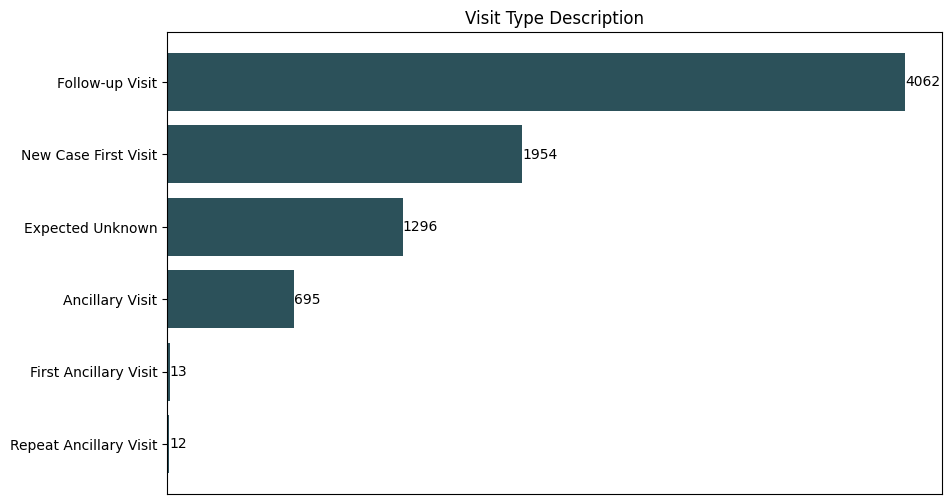

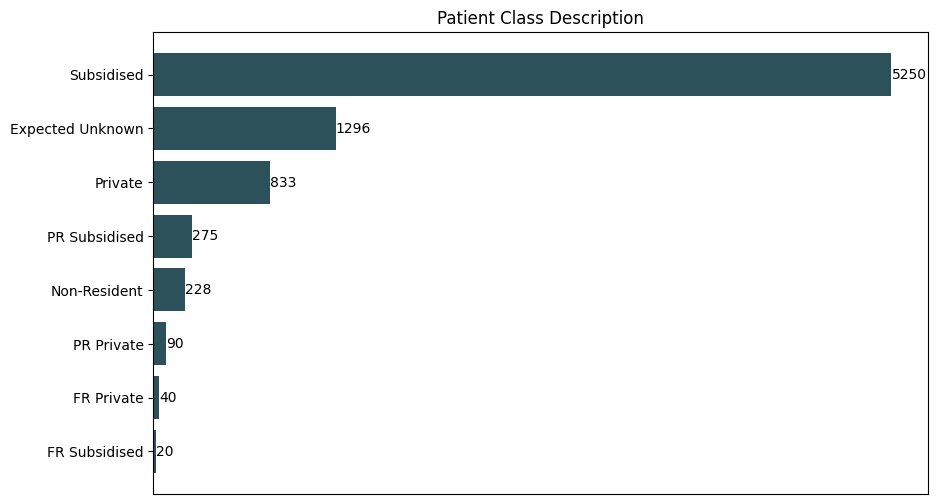

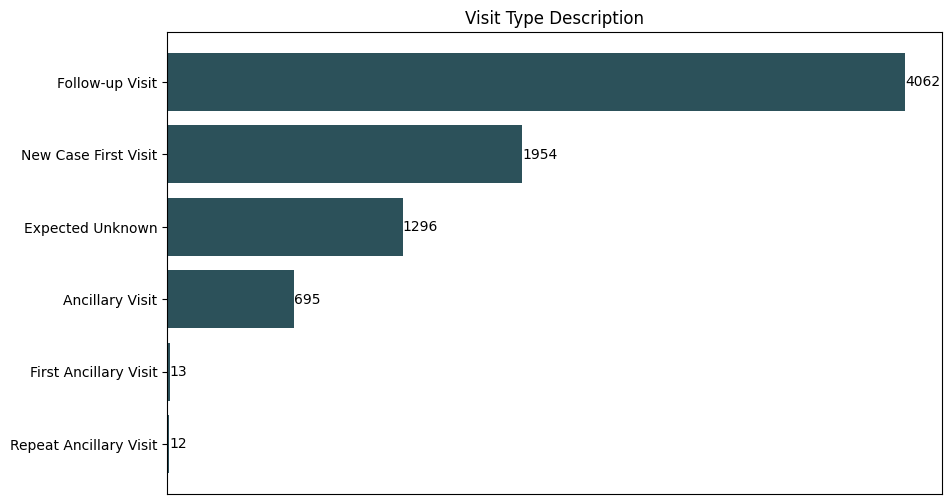

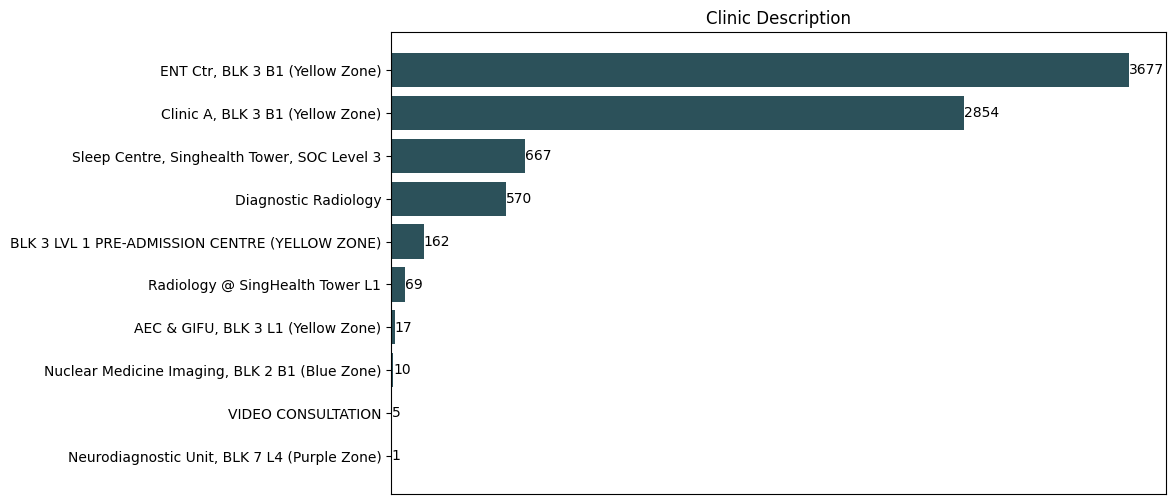

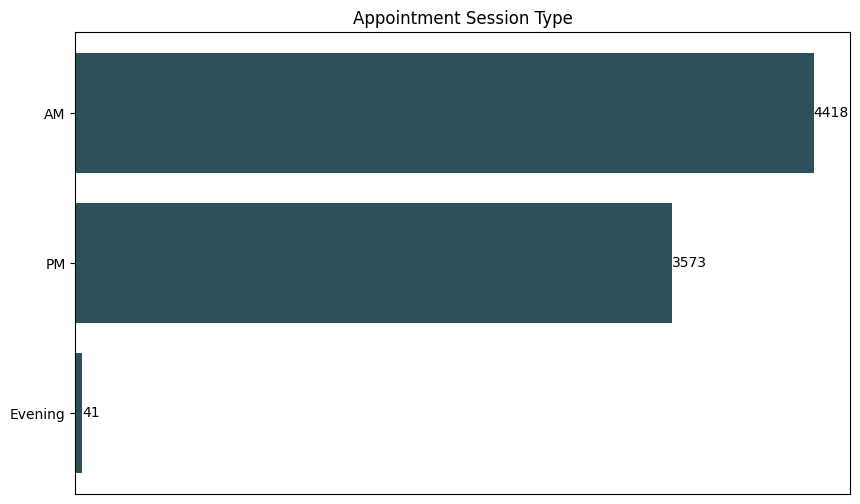

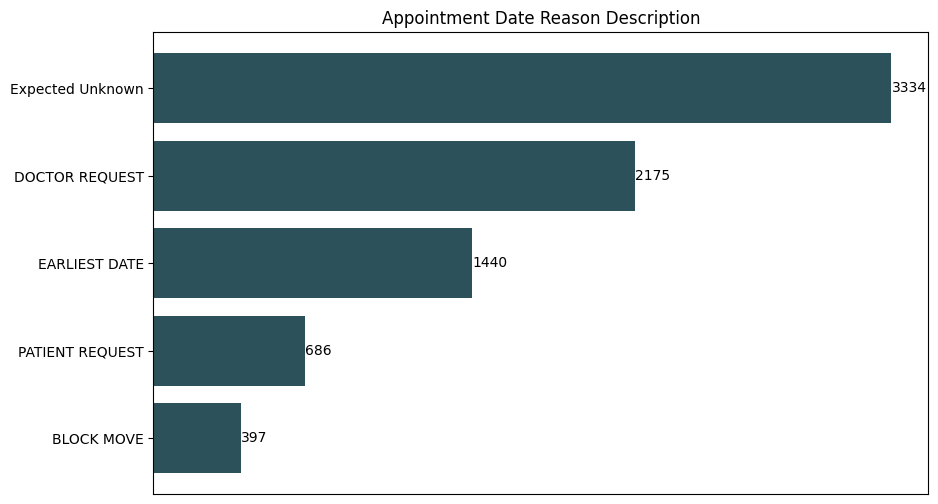

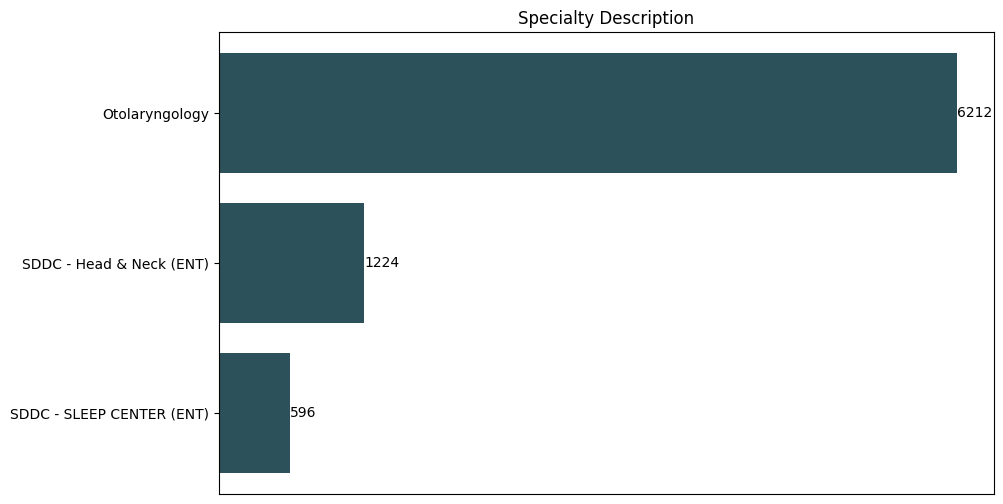

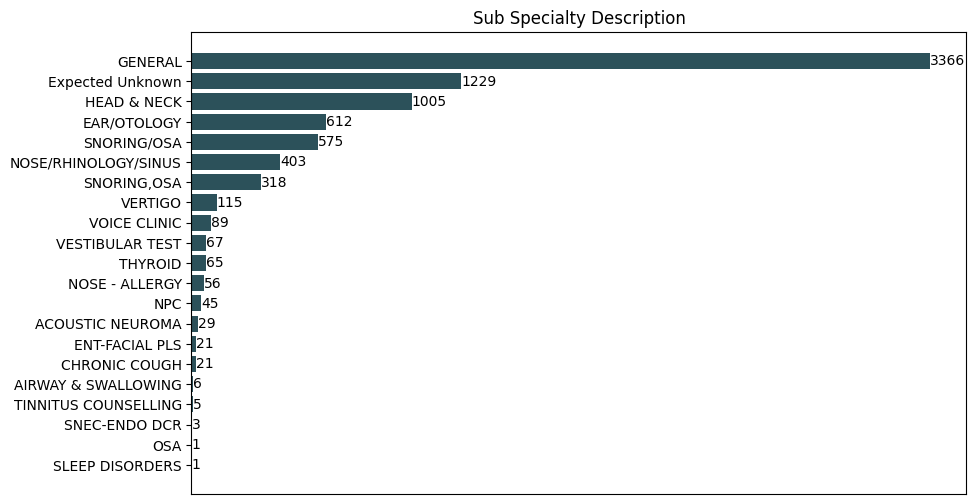

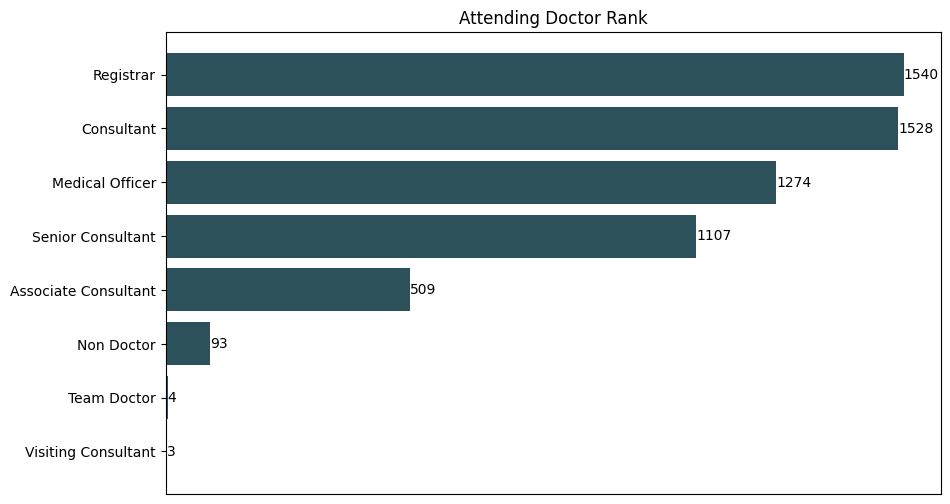

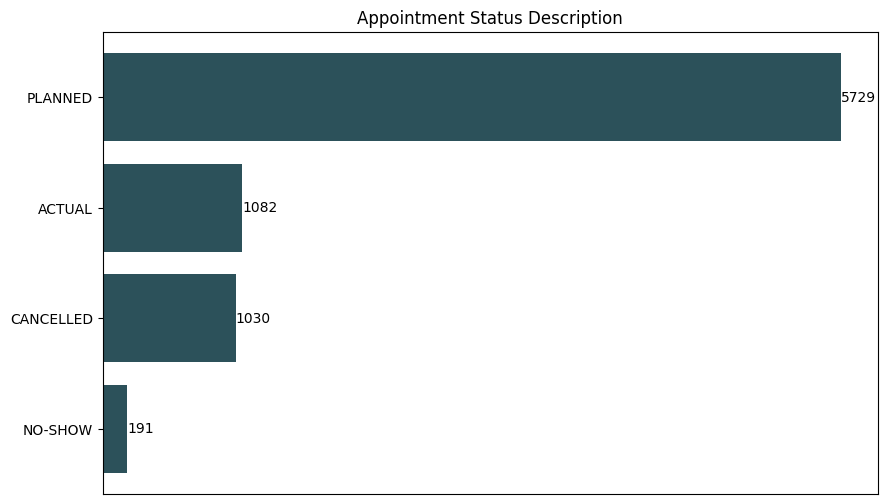

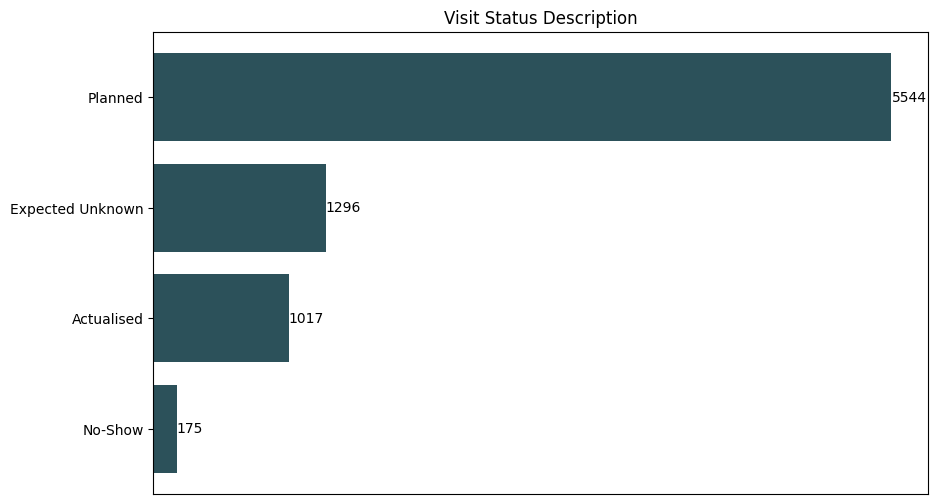

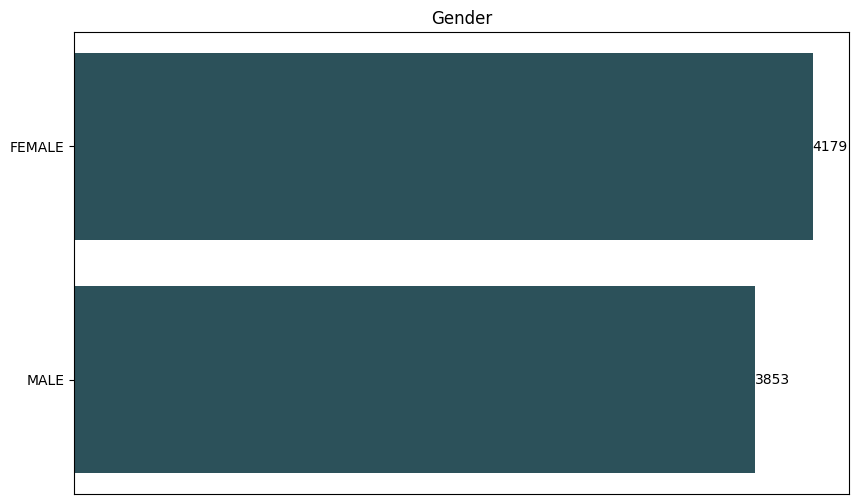

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
CATEGORIES = ['Visit Type Description','Patient Class Description','Visit Type Description','Clinic Description','Appointment Session Type','Appointment Date Reason Description','Specialty Description','Sub Specialty Description','Attending Doctor Rank','Appointment Status Description','Visit Status Description','Gender']
for CATEGORY in CATEGORIES:
    category_counts = df[CATEGORY].value_counts().sort_values(ascending=True)
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(category_counts.index, category_counts.values, color='#2C515A')
    
    # Label the horizontal bar axis
    ax.set_xlabel('Count')
    
    # Hide the x-axis
    ax.xaxis.set_visible(False)
    ax.set_title(CATEGORY)
    # Add data labels
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(bar.get_width()), va='center', ha='left', color='black')
    
    # Show the plot
    plt.show()

## Word Cloud

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [64]:
master_df = get_master_df('ENT')

In [65]:
GROUP_BY = ['Specialty Description']
MESSAGE = 'Appointment Remark'

In [66]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    BAN_WORDS = ['dr','nan','appt','apt', 'trace','clinic','req','tcu','date','email','mths','ref',\
                 'rq','mth','weeks','week','time','yr','year','refer','day','data','pt','months', 'tr']
    for ban_word in BAN_WORDS:
        text = re.sub(r'\b' + re.escape(ban_word) + r'\b', '', text)
    return text

master_df['PREPROCESED_MESSAGE'] = master_df[MESSAGE].astype(str).apply(preprocess_text) 

('Otolaryngology',)


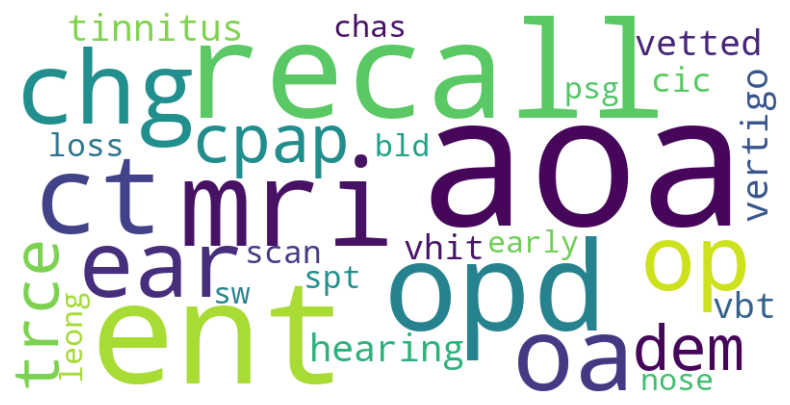

In [68]:
for idx, r in master_df.groupby(GROUP_BY):
    print(idx)
    pp = r['PREPROCESED_MESSAGE']
    combined_text = ' '.join(pp)

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(pp)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()

    tfidf_dict = {}
    for doc_idx in range(len(tfidf_scores)):
        for word_idx in range(len(feature_names)):
            word = feature_names[word_idx]
            score = tfidf_scores[doc_idx][word_idx]
            if word in tfidf_dict:
                tfidf_dict[word] += score
            else:
                tfidf_dict[word] = score
    
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=30).generate_from_frequencies(tfidf_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    break

In [93]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_matrix = cnt_vectorizer.fit_transform(pp)
feature_names = cnt_vectorizer.get_feature_names_out()
cnt_scores = cnt_matrix.toarray()
cnt_dict = {}
for doc_idx in range(len(cnt_scores)):
    for word_idx in range(len(feature_names)):
        word = feature_names[word_idx]
        score = cnt_scores[doc_idx][word_idx]
        if word in cnt_dict:
            cnt_dict[word] += score
        else:
            cnt_dict[word] = score

In [102]:
cnt_df = pd.Series(cnt_dict).reset_index()
cnt_df.columns = ['word','cnt']

In [103]:
tfidf_df = pd.Series(tfidf_dict).reset_index()
tfidf_df.columns=['word','tfidf']

In [104]:
merged_df = cnt_df.merge(tfidf_df, on='word')

In [114]:
merged_df.sort_values('tfidf', ascending=False).head(30)

,word,cnt,tfidf
117,aoa,1112,847.312780
876,ent,1491,481.669498
2297,recall,487,428.976729
1904,opd,977,364.503808
1716,mri,477,340.467222
606,ct,380,276.485610
1868,oa,462,245.521414
445,chg,433,236.010521
813,ear,559,201.894841
1902,op,443,196.237160


In [74]:
pd.Series(tfidf_dict).reset_index().sort_values(0).tail(30)

,index,0
2149,psg,84.351978
825,early,85.213189
2796,sw,85.512879
1825,nose,87.440272
1505,leong,87.729368
428,chas,90.133606
278,bld,90.208974
2716,spt,98.340078
2507,scan,100.750262
1552,loss,101.262602


In [40]:
master_df[master_df[MESSAGE].astype('str').str.contains(' tbt ')][MESSAGE]

151      3mth tbt -pt req chge dtae
450                 6mth tbt tbt us
452                 6mth tbt tbt us
467                     6mth tbt us
651              dr req 6mth tbt us
                    ...            
10471           dr req 3mth tbt mri
10480             dr req 1yr tbt us
10763         2mth tbt fibroscan us
10964             dr req 6wk tbt us
11023       dr req date tbt leticia
Name: Appointment Remark, Length: 427, dtype: object

In [8]:
master_df.head().T

,0,1,2,3,4
Appointment Created Year,2023,2023,2023,2023,2023
Appointment Created Quarter,2,2,2,2,2
Appointment Created Month,4,4,4,4,4
Patient ID,Fxxxx729T,Fxxxx729T,Fxxxx729T,Fxxxx729T,Fxxxx729T
Patient Class Code,NR,NR,NR,NR,NR
Patient Class Description,Non-Resident,Non-Resident,Non-Resident,Non-Resident,Non-Resident
Visit Type Code,FP,FP,FP,FP,FP
Visit Type Description,Follow-up Visit,Follow-up Visit,Follow-up Visit,Follow-up Visit,Follow-up Visit
Appointment Created Date,2023-04-01 00:00:00,2023-04-04 00:00:00,2023-04-11 00:00:00,2023-04-14 00:00:00,2023-04-14 00:00:00
Appointment Created Time,11:32:53,11:54:18,16:51:59,15:34:32,15:40:56


# Creation

In [17]:
FOLDER = 'C:/Users/USER/National University of Singapore/MTech Y1S2 - Documents/General/Final Capstone Project/Dataset/'
ENT_FP = ['ENT Appointments Created (2023-04) (Masked).xlsx','ENT Appointments Created (2023-05) (Masked).xlsx','ENT Appointments Created (2023-06) (Masked).xlsx']
OTO_FP = ['OTO Appointments Created (2023-04) (Masked).xlsx','OTO Appointments Created (2023-05) (Masked).xlsx','OTO Appointments Created (2023-06) (Masked).xlsx']
GAS_FP = ['GAS Appointments Created (2023-04) (Masked).xlsx','GAS Appointments Created (2023-05) (Masked).xlsx','GAS Appointments Created (2023-06) (Masked).xlsx']
MONTHS = [x.strftime('%Y-%m') for x in pd.date_range('2023-04-01','2023-06-01', freq='MS')]
CATEGORIES = ['ENT','OTO','GAS']


def filter_for_demand(df):
    print("_________________")
    print(len(df))
    df = df[df['Visit Type Code'] == "NC"] # New Case
    print(len(df))
    df = df[df['Patient Class Code'].isin(["PSUB","SUB"])] # Payment Class filtering
    print(len(df))
    df = df[df['Appointment Movement Count'] == 0] # Appointment Movement Count
    print(len(df))
    df = df[df['Appointment Date Reason Description'].isin(["DOCTOR REQUEST","EARLIEST DATE","PATIENT REQUEST","BLOCK MOVE"])]# Appointment Reason
    print(len(df))
    df = df[~df['Attending Doctor Rank Code'].isin([None, 'NDR'])] # Remove Doctor Rank
    print(len(df))
    return df

def filter_for_WTA(df):
    df = df[df['Visit Type Code'] == "NC"] # New Case
    df = df[df['Patient Class Code'].isin(["PSUB","SUB"])] # Payment Class filtering
    df = df[df['Appointment Movement Count'] == 0] # Appointment Movement Count
    df = df[df['Appointment Date Reason Description'].isin(["EARLIEST DATE"])]# Appointment Reason
    return df

master_list = []

for file in files:
    
    FP = FOLDER + file
    df = pd.read_excel(FP)
    df_filtered = filter_for_demand(df)
    for speciality in df_filtered['Specialty Code'].unique():
        temp = df_filtered[df_filtered['Specialty Code'] == speciality]
        m = str(temp['Appointment Created Year'].iloc[0]) + "_" + str(temp['Appointment Created Month'].iloc[0])
        cnt = len(temp)
        master_list.append({
            'months':m,
            'categories':speciality,
            'count':cnt})

_________________
52551
7563
6158
4386
4384
4378
_________________
44869
5994
4877
3351
3350
3345
_________________
56229
8114
6657
4922
4915
4900
_________________
53905
8104
6524
4990
4988
4986
_________________
50514
7742
6182
4540
4537
4531
_________________
56097
8270
6673
4987
4987
4979
_________________
50514
7480
6140
4317
4314
4310
_________________
55179
8731
7194
5342
5342
5333
_________________
53724
8458
6947
5191
5191
5185
_________________
46487
7408
6090
4437
4436
4436
_________________
49627
7759
6320
4770
4767
4765
_________________
42281
7672
6367
4675
4672
4671
_________________
47325
7632
6195
4485
4483
4481
_________________
48513
7755
6366
4598
4597
4592
_________________
54890
8871
7347
5385
5384
5380
_________________
45219
7196
5906
4352
4351
4348
_________________
50051
8281
6769
5074
5072
5063
_________________
43745
7471
5957
4605
4605
4600
_________________
55526
9368
7878
5320
5319
5315
_________________
56674
9852
8200
5536
5534
5524
_________________
48

In [13]:
df_filtered.head().T

,2303,2309,2320,2327,2339
Appointment Created Year,2022,2022,2022,2022,2022
Appointment Created Quarter,1,1,1,1,1
Appointment Created Month,1,1,1,1,1
Patient ID,Sxxxx970D,Sxxxx061C,Sxxxx848G,Sxxxx925D,Sxxxx355C
Patient Class Code,SUB,SUB,SUB,SUB,SUB
Patient Class Description,Subsidised,Subsidised,Subsidised,Subsidised,Subsidised
Visit Type Code,NC,NC,NC,NC,NC
Visit Type Description,New Case First Visit,New Case First Visit,New Case First Visit,New Case First Visit,New Case First Visit
Appointment Created Date,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-28 00:00:00,2022-01-13 00:00:00,2022-01-11 00:00:00
Appointment Created Time,15:41:56,16:03:12,09:38:24,17:13:57,09:47:31


In [5]:
len(master_df)

NameError: name 'master_df' is not defined

In [26]:
master_df = pd.DataFrame(master_list)
master_df['month_pp'] = pd.to_datetime(master_df['months'], format='%Y_%m')

master_df.pivot_table(index='month_pp', columns='categories', values='count', aggfunc='sum').to_excel(FOLDER + "Master_Time_Series.xlsx")
